# Solving Systems of Linear Equations: Row Echelon Form and Rank
## Why This Matters

Elimination is powerful, but for larger systems, we need something *structured*.

That’s where the **Row Echelon Form (REF)** and the **Rank** of a matrix come in.

They tell us **how many independent equations we truly have**—a vital idea in ML, where we constantly check whether our data columns (features) carry new information or just echo one another.

## The Rank of a Matrix

The **rank** of a matrix measures its *informational depth*.

Formally, it’s the **number of linearly independent rows or columns**.

If you think of each row as a statement (equation),

the rank counts how many statements are *actually saying something new*.

### Example

Matrix

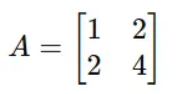

Here, the second row is just twice the first.

Both are pointing in the same “direction” in space → **linearly dependent**.

So, even though there are 2 rows, there’s only **1 piece of unique information**.

Hence, **rank = 1**.

In ML, this means: two features that are scaled copies of each other don’t add learning value—they’re redundant.

In [11]:
import numpy as np
from sympy import Matrix

In [5]:
# ------------------------------------------------
# Why Rank Matters
# ------------------------------------------------
print("=== Why Rank Matters ===")
A = np.array([[2, 4],
              [1, 2]], dtype=float)

print("Matrix A:\n", A)
print("Rank of A =", np.linalg.matrix_rank(A))

# Here, the second row is just half the first → linearly dependent.
# So, rank = 1 → system is singular (no unique solution).


=== Why Rank Matters ===
Matrix A:
 [[2. 4.]
 [1. 2.]]
Rank of A = 1




---

## Rank in General

If a matrix A has:

- **Rank = n (full rank)** → the system is *non-singular*, unique solution exists.
- **Rank < n** → *singular*, there are either infinite or no solutions.

For an m×n system (m equations, n variables):

| Case | Meaning | ML Analogy |
| --- | --- | --- |
| rank = n | Enough independent info to solve for all variables | Distinct, useful features |
| rank < n | Missing independent info | Correlated or duplicate features |
| rank < m | Some equations redundant | Repeated patterns in data |







In [6]:
# ------------------------------------------------
# Rank in Different Cases
# ------------------------------------------------
print("\n=== Rank in Different Cases ===")

A_full = np.array([[1, 2, 3],
                   [0, 1, 4],
                   [5, 6, 0]], dtype=float)
A_singular = np.array([[1, 2, 3],
                       [2, 4, 6],
                       [3, 6, 9]], dtype=float)

print("Rank of full-rank matrix =", np.linalg.matrix_rank(A_full))
print("Rank of singular matrix =", np.linalg.matrix_rank(A_singular))


=== Rank in Different Cases ===
Rank of full-rank matrix = 3
Rank of singular matrix = 1




---
## Row Echelon Form (REF)

Now, let’s talk **row echelon form**—the disciplined version of your matrix after applying Gaussian elimination.

A matrix is in *row echelon form* if it follows these three rules:

1. All nonzero rows are above any rows of all zeros.
2. Each leading entry (the first nonzero number from the left) of a row is to the **right** of the leading entry above it.
3. All entries below a leading entry are **zeros**.

In short: the matrix “steps down” neatly like a staircase.

Example
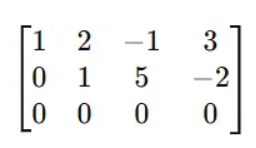

See the stair pattern?

That’s **row echelon form**. Each pivot moves one column to the right.

## Row Echelon Form in General

Any system of equations can be transformed (via legal row operations) into this form.

From there, solving becomes almost mechanical: you back-substitute upward from the last nonzero row to the first.

In [7]:
# ------------------------------------------------
# Row Echelon Form (REF) manually using sympy
# ------------------------------------------------
print("\n=== Row Echelon Form (REF) ===")

M = Matrix([[1, 2, -1, -4],
            [2, 3, -1, -11],
            [-2, 0, -3, 22]])

print("Original Matrix:")
display(M)

# Get the Row Echelon Form
M_ref, pivots = M.echelon_form(), M.rank()
print("Row Echelon Form:")
display(M_ref)
print("Rank from echelon form:", pivots)


=== Row Echelon Form (REF) ===
Original Matrix:


Matrix([
[ 1, 2, -1,  -4],
[ 2, 3, -1, -11],
[-2, 0, -3,  22]])

Row Echelon Form:


Matrix([
[1,  2, -1, -4],
[0, -1,  1, -3],
[0,  0,  1, -2]])

Rank from echelon form: 3




---

## Reduced Row Echelon Form (RREF)

Now imagine your echelon form got a glow-up.

You not only have zeros **below** the pivots, but also **above** them.

Each pivot (leading 1) stands alone, proud and clean, like a beacon of clarity.

### Rules for RREF:

1. The matrix is in row echelon form.
2. Every pivot is **1**.
3. Each pivot column has **zeros everywhere else** (above and below).

### Example
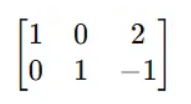

Now each variable corresponds directly to a clear value:

x=2, y=−1

Computers 🖥️ love 😍 this form—it’s the cleanest, most standardized version for solving linear systems.

Libraries like NumPy’s `np.linalg.solve()` or `np.linalg.matrix_rank()` rely on these transformations internally.

In [8]:
# ------------------------------------------------
# Reduced Row Echelon Form (RREF)
# ------------------------------------------------
print("\n=== Reduced Row Echelon Form (RREF) ===")

M_rref, pivot_columns = M.rref()
print("Reduced Row Echelon Form:")
display(M_rref)
print("Pivot columns:", pivot_columns)


=== Reduced Row Echelon Form (RREF) ===
Reduced Row Echelon Form:


Matrix([
[1, 0, 0, -8],
[0, 1, 0,  1],
[0, 0, 1, -2]])

Pivot columns: (0, 1, 2)




---

## Connecting Rank and Echelon Form

After converting any matrix to row echelon form,

the **number of nonzero rows** you’re left with equals the **rank**.

### Example

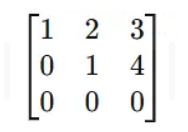

→ Two nonzero rows → **rank = 2**

That’s the count of independent equations.





---
## 🤖 Machine Learning Connection

In linear regression, we compute:
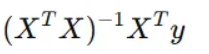

Only valid when 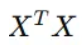

has full rank.

If not, the inverse doesn’t exist—your model can’t find unique weights.

That’s why checking matrix rank matters before training models, especially when using real-world datasets with overlapping features.

In [10]:
# ------------------------------------------------
# Machine Learning Connection
# ------------------------------------------------
print("\n=== Machine Learning Connection ===")

# Simulate feature matrix X with collinearity
X = np.array([[1, 2, 3],
              [2, 4, 6],
              [3, 6, 9]], dtype=float)
y = np.array([1, 2, 3])

XtX = X.T @ X
rank_XtX = np.linalg.matrix_rank(XtX)
det_XtX = np.linalg.det(XtX)

print("X^T X:\n", XtX)
print("Rank of X^T X =", rank_XtX)
print("Determinant =", det_XtX)

if det_XtX == 0:
    print("⚠️  X^T X is singular — cannot find unique regression weights.")
else:
    w = np.linalg.inv(XtX) @ X.T @ y
    print("Regression weights:", w)


=== Machine Learning Connection ===
X^T X:
 [[ 14.  28.  42.]
 [ 28.  56.  84.]
 [ 42.  84. 126.]]
Rank of X^T X = 1
Determinant = 0.0
⚠️  X^T X is singular — cannot find unique regression weights.




---

### === Summary ===
• Rank measures independent information in a matrix.

• REF shows the "staircase" structure after elimination.

• RREF further simplifies the matrix to clear pivot positions.

• Rank = number of pivot rows = number of independent equations.

• In ML, $$X^T X$$ must have full rank for the normal equation to work.